In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd


file = open('timeseries_aal.csv', 'rb')
data = np.loadtxt(file, delimiter = ",")
rows, cols = np.shape(data)
x = np.arange(0, cols)


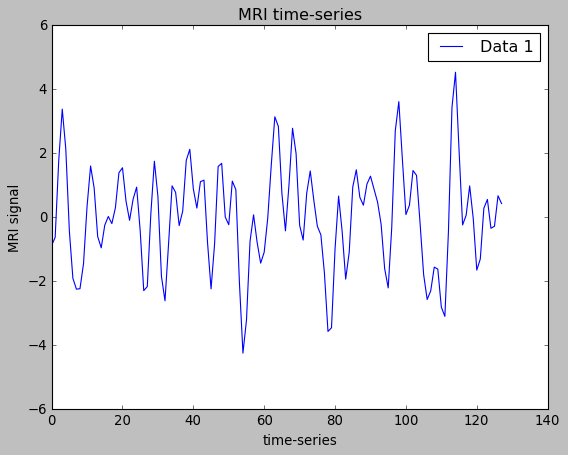

In [2]:
fig, ax = plt.subplots()
ax.plot(x, data[0], label = 'Data 1')
ax.set(xlabel = 'time-series' , ylabel = 'MRI signal', title = 'MRI time-series')
ax.legend()

Text(0, 0.5, 'MRI signal')

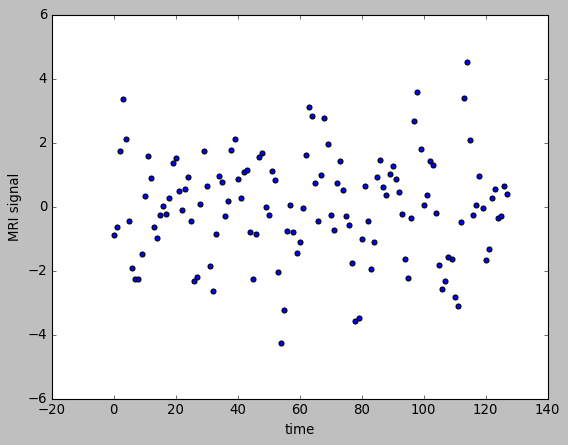

In [3]:
fig, ax = plt.subplots()
plt.scatter(x, data[0])
plt.xlabel('time')
plt.ylabel('MRI signal')


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


x_new = x[:, np.newaxis]
y_new = data[0, :,np.newaxis]
first_row = np.hstack([x_new, y_new])



C:\Users\sabal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Squared-Error')

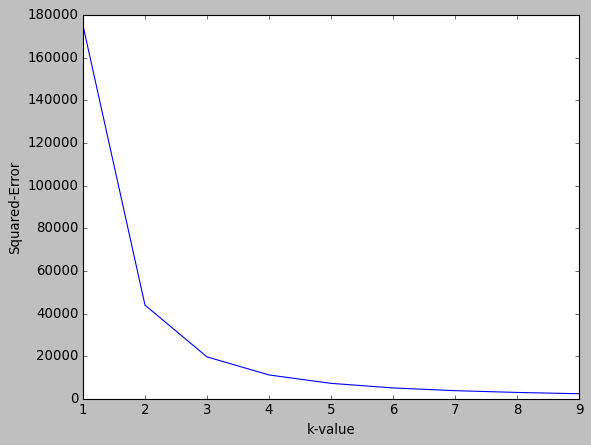

In [71]:
#elbow plot to check for the best k value

check_error= []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(first_row)
    check_error.append(km.inertia_)

plt.plot(k_range, check_error)
plt.xlabel('k-value')
plt.ylabel('Squared-Error')


In [5]:
kmeans = KMeans(n_clusters = 3)
y_predicted = kmeans.fit_predict(first_row)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

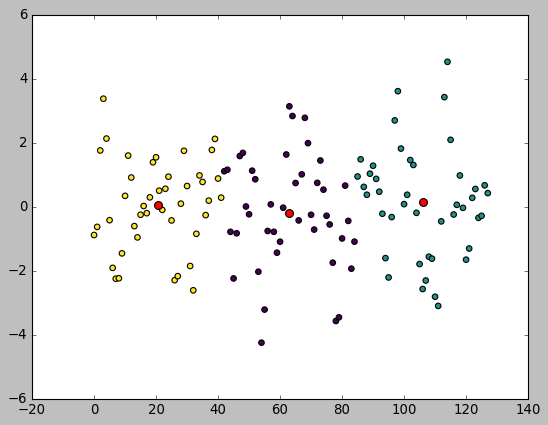

In [74]:
plt.scatter(first_row[:, 0], first_row[:, 1], c = y_predicted, s=25, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 50)


In [8]:
from sklearn.mixture import GMM

gmm = GMM(n_components = 3).fit(first_row)
all_labels = gmm.predict(first_row)
plt.scatter(first_row[:, 0], first_row[:, 1], c = all_labels, s = 25, cmap = 'viridis')



ImportError: cannot import name 'GMM' from 'sklearn.mixture' (C:\Users\sabal\anaconda3\lib\site-packages\sklearn\mixture\__init__.py)